In [1]:
from pytket import Circuit
from pytket.utils import Graph
from pytket.backends.ibm import AerBackend, AerStateBackend
from qiskit.visualization import plot_bloch_multivector

##Graph(circ).view_DAG()
##Graph(circ).get_DAG()

In [2]:
#def qft_rotation():
#    circ = Circuit(4,4)
#
#    circ.X(0)
#    circ.X(1)
#
#    circ.H(3)
#    circ.CRz(0.125,0,3)
#    circ.CRz(0.25 ,1,3) 
#    circ.CRz(0.5  ,2,3)
#
#    circ.H(2)
#    circ.CRz(0.25 ,0,2)
#    circ.CRz(0.5  ,1,2)
#
#    circ.H(1)
#    circ.CRz(0.5  ,0,1)
#
#    circ.H(0)
#
#    print(circ.get_commands())

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.H(n)   # anhadimos la puerta H
    for qubit in range(n):
        circuit.CRz((1/(2**(n-qubit))), qubit, n) # pasamos el numero, el qubit de control
                                            # y luego el objetivo.
    qft_rotations(circuit, n)


In [3]:
def swap_registers(circuit, n):
    for qubit in range(n//2): # tenemos que hacer el swap para queden bien 
        circuit.SWAP(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [4]:
n = 4
circ = Circuit(n,n)
circ.X(0)
circ.X(1)
qft(circ,n)

[X q[0]; X q[1]; H q[3]; CRz(0.125*PI) q[0], q[3]; CRz(0.25*PI) q[1], q[3]; CRz(0.5*PI) q[2], q[3]; H q[2]; CRz(0.25*PI) q[0], q[2]; CRz(0.5*PI) q[1], q[2]; H q[1]; CRz(0.5*PI) q[0], q[1]; H q[0]; SWAP q[1], q[2]; SWAP q[0], q[3]; ]

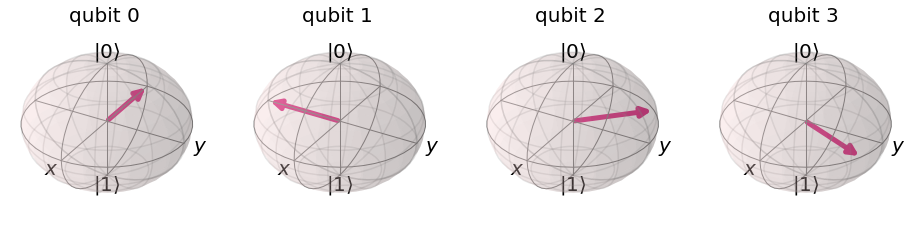

In [5]:
backend = AerStateBackend()
backend.compile_circuit(circ)

handle = backend.process_circuit(circ)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

Como podemos ver, los resultados son los esperados, ya que el Qubit 3 recorre 3/16, el qubit 2, el doble q es 6/16 (3/8), el qubit 1 3/4 y el Qubit 0, 3/2( que da una vuelta media).

In [6]:
def qft_rotationsInverse(circuit):
    circuit.SWAP(0,3)
    circuit.SWAP(1,2)

    circuit.H(0)

    
    circuit.CRz(-0.5, 0, 1)
    circuit.H(1) 

    circuit.add_barrier([0, 1, 2, 3])
    circuit.CRz(-0.25, 0, 2)
    circuit.CRz(-0.5, 1, 2)
    circuit.H(2) 

    circuit.add_barrier([0, 1, 2, 3])
    circuit.CRz(-0.125, 0, 3)
    circuit.CRz(-0.25, 1, 3)
    circuit.CRz(-0.5, 2, 3) 
    circuit.H(3) 

In [7]:


qft_rotationsInverse(circ)

In [8]:
circ.measure_all()

[U3(1*PI, 0*PI, 1*PI) q[0]; U3(1*PI, 0*PI, 1*PI) q[1]; U3(3.5*PI, 1.0625*PI, 0*PI) q[3]; CX q[0], q[3]; U1(1.9375*PI) q[3]; CX q[0], q[3]; U1(0.125*PI) q[3]; CX q[1], q[3]; U1(1.875*PI) q[3]; CX q[1], q[3]; U1(0.25*PI) q[3]; CX q[2], q[3]; U1(1.75*PI) q[3]; CX q[2], q[3]; U3(3.5*PI, 1.125*PI, 0*PI) q[2]; CX q[0], q[2]; U1(1.875*PI) q[2]; CX q[0], q[2]; U1(0.25*PI) q[2]; CX q[1], q[2]; U1(1.75*PI) q[2]; CX q[1], q[2]; U3(3.5*PI, 1.25*PI, 0*PI) q[1]; CX q[0], q[1]; U1(1.75*PI) q[1]; CX q[0], q[1]; U3(0.5*PI, 0*PI, 1*PI) q[0]; CX q[1], q[2]; CX q[0], q[3]; CX q[2], q[1]; CX q[3], q[0]; CX q[1], q[2]; CX q[0], q[3]; SWAP q[1], q[2]; SWAP q[0], q[3]; H q[0]; CRz(3.5*PI) q[0], q[1]; H q[1]; Barrier q[0], q[1], q[2], q[3]; CRz(3.75*PI) q[0], q[2]; CRz(3.5*PI) q[1], q[2]; H q[2]; Barrier q[0], q[1], q[2], q[3]; CRz(3.875*PI) q[0], q[3]; Measure q[0] --> c[0]; CRz(3.75*PI) q[1], q[3]; Measure q[1] --> c[1]; CRz(3.5*PI) q[2], q[3]; Measure q[2] --> c[2]; H q[3]; Measure q[3] --> c[3]; ]

In [9]:
b = AerBackend()
b.compile_circuit(circ)
handle = b.process_circuit(circ, 1000)
result = b.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(1, 1, 0, 0): 1000})


Como vemos en el resultado, nos ha dado 1000 veces el qubit que hemos introducido. 